In [ ]:
# This model was trained and tested on the original dataset. Synthetic data was used as the validation
# dataset for the model.

In [ ]:
# Loading dataset
import pandas as pd
df = pd.read_csv('kepler.csv')
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [ ]:
# Retrieving names of columns
df.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [ ]:
# Retrieving the no. of rows in df
len(df)

9564

In [ ]:
# Dropping unimportant columns
df=df.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name','koi_teq_err1','koi_teq_err2','koi_tce_delivname'],axis=1)
# Retrieving the no. of rows in df
len(df.columns)

43

<ipython-input-56-e7b8750ee500>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', center=0)


<Axes: >

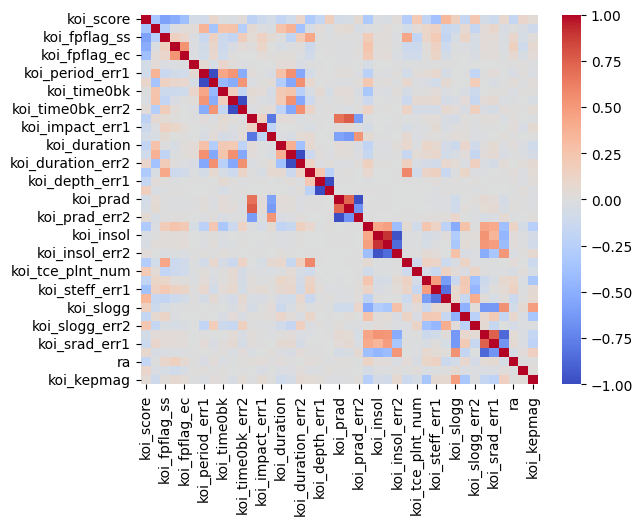

In [ ]:
# Plotting correaltion heatmap of df
import seaborn as sns
sns.heatmap(df.corr(), cmap='coolwarm', center=0)

In [ ]:
# Retrieving unique values of column
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [ ]:
'''For koi_disposition:
CONFIRMED==1
CANDIDATE==0
FALSE POSITIVE==-1
'''
# Mapping column
df['new_koi_disposition'] = df['koi_disposition'].map({'CONFIRMED': 1, 'CANDIDATE': 0, 'FALSE POSITIVE': -1})

In [ ]:
# Retrieving unique values of column
df['koi_pdisposition'].unique()

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [ ]:
'''For koi_pdisposition:
CANDIDATE==0
FALSE POSITIVE==-1
'''
# Mapping column
df['new_koi_pdisposition'] = df['koi_disposition'].map({ 'CANDIDATE': 0, 'FALSE POSITIVE': -1})

In [ ]:
#Dropping string columns after creating new mapped columns
df=df.drop(['koi_disposition','koi_pdisposition'],axis=1)

In [ ]:
df.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,new_koi_disposition,new_koi_pdisposition
0,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,NaN
1,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,NaN
2,0.000,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,-1,-1.0
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,-1,-1.0
4,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,NaN


In [ ]:
# List of NULL values in df
df.isna().sum()

koi_score               1510
koi_fpflag_nt              0
koi_fpflag_ss              0
koi_fpflag_co              0
koi_fpflag_ec              0
koi_period                 0
koi_period_err1          454
koi_period_err2          454
koi_time0bk                0
koi_time0bk_err1         454
koi_time0bk_err2         454
koi_impact               363
koi_impact_err1          454
koi_impact_err2          454
koi_duration               0
koi_duration_err1        454
koi_duration_err2        454
koi_depth                363
koi_depth_err1           454
koi_depth_err2           454
koi_prad                 363
koi_prad_err1            363
koi_prad_err2            363
koi_teq                  363
koi_insol                321
koi_insol_err1           321
koi_insol_err2           321
koi_model_snr            363
koi_tce_plnt_num         346
koi_steff                363
koi_steff_err1           468
koi_steff_err2           483
koi_slogg                363
koi_slogg_err1           468
koi_slogg_err2

In [ ]:
# Converting all values to float datatype
df = df.astype(float)

In [ ]:
# Removing NULL values by imputing with mean of values of that column
df = df.apply(lambda col: col.fillna(col.mean()))

In [ ]:
# List of NULL values, if any
df.isna().sum()

koi_score               0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1         0
koi_period_err2         0
koi_time0bk             0
koi_time0bk_err1        0
koi_time0bk_err2        0
koi_impact              0
koi_impact_err1         0
koi_impact_err2         0
koi_duration            0
koi_duration_err1       0
koi_duration_err2       0
koi_depth               0
koi_depth_err1          0
koi_depth_err2          0
koi_prad                0
koi_prad_err1           0
koi_prad_err2           0
koi_teq                 0
koi_insol               0
koi_insol_err1          0
koi_insol_err2          0
koi_model_snr           0
koi_tce_plnt_num        0
koi_steff               0
koi_steff_err1          0
koi_steff_err2          0
koi_slogg               0
koi_slogg_err1          0
koi_slogg_err2          0
koi_srad                0
koi_srad_err1           0
koi_srad_err2           0
ra          

In [ ]:
# View of processed df
df.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,new_koi_disposition,new_koi_pdisposition
0,1.000,0.0,0.0,0.0,0.0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,-0.690827
1,0.969,0.0,0.0,0.0,0.0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,-0.690827
2,0.000,0.0,1.0,0.0,0.0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,-1.0,-1.000000
3,0.000,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,-1.0,-1.000000
4,1.000,0.0,0.0,0.0,0.0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0,-0.690827


In [ ]:
'''For koi_disposition:
CONFIRMED==1
CANDIDATE==0
FALSE POSITIVE==-1
'''
# For understanding the original dataset distribution
conf=0 # count of confirmed exoplanets
falpos=0 #count of false positives
cand=0 # count of candidates
for i in df['new_koi_disposition']:
  if i==1:
    conf+=1
  elif i==-1:
    falpos+=1
  else:
    cand+=1
print("Count of confirmed exoplanets: ",conf)
print("Count of false positives: ",falpos)
print("Count of candidates: ",cand)

Count of confirmed exoplanets:  2293
Count of false positives:  5023
Count of candidates:  2248


In [ ]:
'''For koi_pdisposition:
CANDIDATE==0
FALSE POSITIVE==-1
'''
# For understanding the dataset distribution
falpos=0 #count of false positives
cand=0 # count of candidates
for i in df['new_koi_pdisposition']:
  if i==-1:
    falpos+=1
  else:
    cand+=1
print("Count of false positives: ",falpos)
print("Count of candidates: ",cand)

Count of false positives:  5023
Count of candidates:  4541


In [ ]:
# Target Variable: new_koi_disposition (confirmed=1,candidate=0,false positive=-1)

In [ ]:
# Train and Test datasets created
import pandas as pd
from sklearn.model_selection import train_test_split

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)  # You can use any random_state value for reproducibility

# Extract features and target variable from the shuffled DataFrame
X = df.drop('new_koi_disposition', axis=1)
y = df['new_koi_disposition']

# Perform an 80-20 train-test split on the shuffled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train-test: 80-20 split

print("Length of training data: ",len(X_train),len(y_train))
print("Length of testing data: ",len(X_test),len(y_test))

Length of training data:  7651 7651
Length of testing data:  1913 1913


In [ ]:
# Building the Model: Unidirectional LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add((LSTM(units=200)))
model.add(Dense(units=200, activation='tanh'))
model.add(Dense(units=200, activation='tanh'))
model.add(Dense(units=200, activation='tanh'))
model.add(Dense(units=1, activation='tanh'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data
X_train = X_train.to_numpy()
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
240/240 [==============================] - 6s 10ms/step - loss: -4.3865 - accuracy: 0.2332
Epoch 2/50
240/240 [==============================] - 2s 7ms/step - loss: -4.4233 - accuracy: 0.2330
Epoch 3/50
240/240 [==============================] - 2s 7ms/step - loss: -4.4233 - accuracy: 0.2330
Epoch 4/50
240/240 [==============================] - 2s 7ms/step - loss: -4.4233 - accuracy: 0.2330
Epoch 5/50
240/240 [==============================] - 2s 7ms/step - loss: -4.4233 - accuracy: 0.2330
Epoch 6/50
240/240 [==============================] - 2s 7ms/step - loss: -4.4233 - accuracy: 0.2330
Epoch 7/50
240/240 [==============================] - 3s 10ms/step - loss: -4.4233 - accuracy: 0.2330
Epoch 8/50
240/240 [==============================] - 2s 9ms/step - loss: -4.4233 - accuracy: 0.2330
Epoch 9/50
240/240 [==============================] - 2s 7ms/step - loss: -4.4233 - accuracy: 0.2330
Epoch 10/50
240/240 [==============================] - 2s 7ms/step - loss: -4.4233 - accu

In [ ]:
# Predicting on the test data
# Reshape the input data
X_test = X_test.to_numpy()
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_pred = model.predict(X_test)
# for i in y_pred:
#   print(i)
# print(len(y_pred))

60/60 [==============================] - 1s 2ms/step


In [ ]:
# Assigning closest labels to prediction of test data
y_pred = y_pred.astype(float)
for i in y_pred:
  if i<0:
    y_pred[np.where(y_pred == i)] = -1
  if i>=0.5:
    y_pred[np.where(y_pred == i)] = 1
  else:
    y_pred[np.where(y_pred == i)] = 0

# for i in y_pred:
#    print(i)

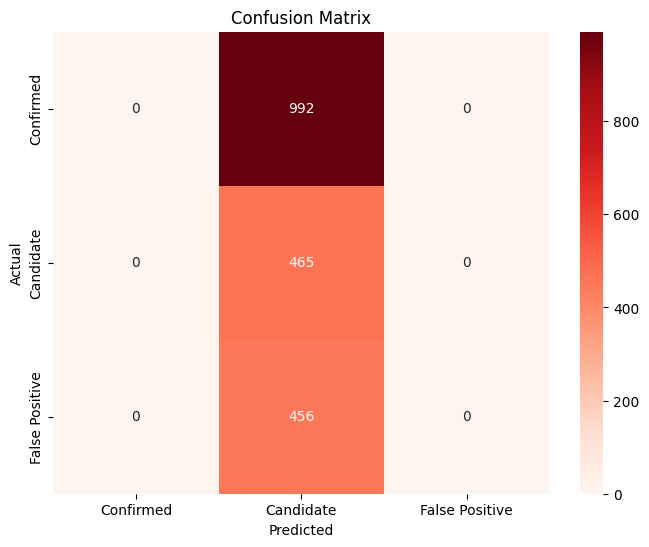

In [ ]:
# Calculate confusion matrix for test data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Reds, xticklabels=['Confirmed','Candidate', 'False Positive'], yticklabels=['Confirmed','Candidate', 'False Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate RMSE for test data
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  0.8700151112362383


In [ ]:
# Validation using synthetic data generated by GAN
val_data=pd.read_csv("synthetic_data.csv")
val_data.columns=df.columns
val_data.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,new_koi_disposition,new_koi_pdisposition
0,-0.670137,-0.247104,-0.662720,0.113531,-0.390740,0.726066,-0.184580,-0.867433,-0.455210,0.570621,...,-0.619092,0.145443,0.363080,-0.474248,0.740241,0.344780,-0.621713,-0.255908,-0.291088,-0.017894
1,0.233348,0.557714,0.893774,0.053864,0.349669,-0.484918,-0.312067,-0.421184,-0.496371,0.214564,...,0.618671,-0.091712,0.607847,-0.952708,0.017679,0.568257,-0.428686,0.811639,-0.685729,-0.876755
2,0.662985,0.566768,-0.107776,0.554157,0.315420,0.637097,0.034574,0.325251,-0.331818,0.568395,...,0.234140,0.224246,0.185214,0.270585,0.929725,-0.200525,-0.382542,0.382602,0.393008,-0.220235
3,0.680046,0.307924,0.583541,-0.161146,-0.079638,-0.107175,-0.472992,0.506922,0.252926,0.408881,...,0.675194,0.007851,-0.622868,-0.430434,0.881702,-0.309851,0.238306,0.657102,0.530762,0.592204
4,0.722378,-0.091005,-0.754783,-0.742078,-0.266893,0.392631,0.051777,-0.648753,0.432977,0.753359,...,0.020216,0.256367,0.509917,-0.892158,0.499274,-0.412243,0.372121,-0.146570,-0.490443,0.003489


In [ ]:
# List of NULL values in validation data, if any
val_data.isna().sum()

koi_score               0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1         0
koi_period_err2         0
koi_time0bk             0
koi_time0bk_err1        0
koi_time0bk_err2        0
koi_impact              0
koi_impact_err1         0
koi_impact_err2         0
koi_duration            0
koi_duration_err1       0
koi_duration_err2       0
koi_depth               0
koi_depth_err1          0
koi_depth_err2          0
koi_prad                0
koi_prad_err1           0
koi_prad_err2           0
koi_teq                 0
koi_insol               0
koi_insol_err1          0
koi_insol_err2          0
koi_model_snr           0
koi_tce_plnt_num        0
koi_steff               0
koi_steff_err1          0
koi_steff_err2          0
koi_slogg               0
koi_slogg_err1          0
koi_slogg_err2          0
koi_srad                0
koi_srad_err1           0
koi_srad_err2           0
ra          

<Axes: >

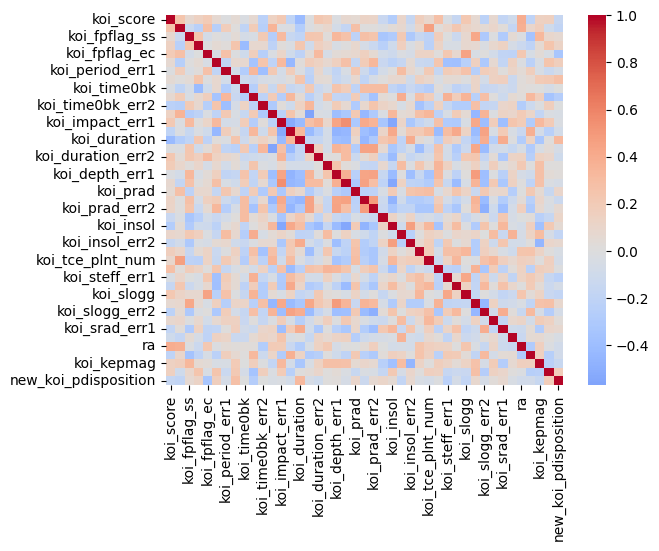

In [ ]:
# Plotting correaltion heatmap of validation data
import seaborn as sns
sns.heatmap(val_data.corr(), cmap='coolwarm', center=0)

In [ ]:
# Target Variable: new_koi_disposition (confirmed=1,candidate=0,false positive=-1)

In [ ]:
# Observing original values in validation data
val_data['new_koi_disposition'].head()

0   -0.291088
1   -0.685729
2    0.393008
3    0.530762
4   -0.490443
Name: new_koi_disposition, dtype: float64

In [ ]:
# Assigning closest labels for validation data
val_data['new_koi_disposition'] = val_data['new_koi_disposition'].astype(float)
for i in val_data['new_koi_disposition']:
  if i<0:
    val_data['new_koi_disposition'][val_data['new_koi_disposition'] == i] = -1
  if i>=0.5:
    val_data['new_koi_disposition'][val_data['new_koi_disposition'] == i] = 1
  else:
    val_data['new_koi_disposition'][val_data['new_koi_disposition'] == i] = 0

# for i in val_data['new_koi_disposition']:
#    print(i)

In [ ]:
'''For koi_disposition:
CONFIRMED==1
CANDIDATE==0
FALSE POSITIVE==-1
'''
# For understanding the validation dataset distribution
conf=0 # count of confirmed exoplanets
falpos=0 #count of false positives
cand=0 # count of candidates
for i in val_data['new_koi_disposition']:
  if i==1:
    conf+=1
  elif i<0:
    falpos+=1
  else:
    cand+=1
print("Count of confirmed exoplanets: ",conf)
print("Count of false positives: ",falpos)
print("Count of candidates: ",cand)

Count of confirmed exoplanets:  469
Count of false positives:  0
Count of candidates:  1823


In [ ]:
# Creating validation input and correct labels set
val_data_input=val_data.drop(['new_koi_disposition'],axis=1)
val_data_true_labels=val_data['new_koi_disposition']

In [ ]:
# Predicting on the validation data
# Reshape the input data
val_data_input = val_data_input.to_numpy()
val_data_input = val_data_input.reshape((val_data_input.shape[0], 1, val_data_input.shape[1]))
val_pred = model.predict(val_data_input)

# for i in val_pred:
#   print(i)
# print(len(val_pred))

72/72 [==============================] - 0s 2ms/step


In [ ]:
# Assigning closest labels on predictions of validation data
val_pred = val_pred.astype(float)
for i in val_pred:
  if i<0:
    val_pred[np.where(val_pred == i)] = -1
  if i>=0.5:
    val_pred[np.where(val_pred == i)] = 1
  else:
    val_pred[np.where(val_pred == i)] = 0

# for i in val_pred:
#    print(i)

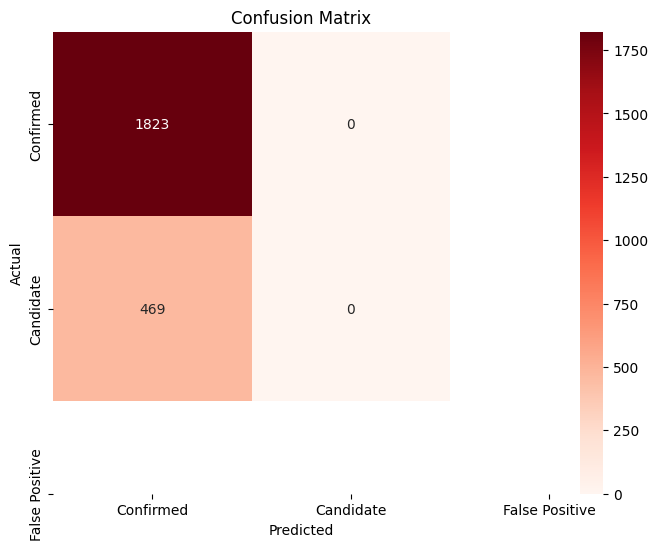

In [ ]:
# Calculate confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(val_data_true_labels, val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Reds, xticklabels=['Confirmed','Candidate', 'False Positive'], yticklabels=['Confirmed','Candidate', 'False Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate RMSE for validation data
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val_data_true_labels, val_pred)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  0.452354708000163
